# Importing Libraries

In [1]:
# importing libraries
# https://anaconda.org/mzh/pyflux
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline 
from pylab import rcParams
from pandas import datetime
from matplotlib import pyplot as plt
import os
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pyflux as pf
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error

C:\Users\m\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
#setting visualisation size
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

# Energy Data

In [3]:
# importing daily dataset files
block_0 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_0.csv")
block_1 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_1.csv")
block_2 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_2.csv")
block_3 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_3.csv")
block_4 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_4.csv")
block_5 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_5.csv")
block_6 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_6.csv")
block_7 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_7.csv")
household_acorn_info = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\informations_households_Cleaned.csv")
average_energy = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\Average_energy_per_day.csv")

In [4]:
# checking the number of rows of first file
len(block_0)

15465

In [5]:
# adding all files in one data frame
Dfs = [block_0, block_1, block_2, block_3, block_4, block_5, block_6,block_7]
Combined = pd.concat(Dfs)

In [6]:
# checking the number of rows in each dataframe
len(Combined)

105609

In [7]:
# checking that the combined data frame 
Combined.head(5)

,Household_Id,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,01/01/2013,0.1925,0.225000,0.886,48,0.164066,10.800,0.076
1,MAC000002,01/02/2013,0.2365,0.277083,1.078,48,0.189625,13.300,0.073
2,MAC000002,01/03/2013,0.1955,0.209875,1.098,48,0.154632,10.074,0.075
3,MAC000002,01/04/2013,0.1815,0.205354,0.662,48,0.132950,9.857,0.072
4,MAC000002,01/05/2013,0.1975,0.232729,1.181,48,0.186772,11.171,0.075


In [8]:
household_acorn_info.head(5)

,Household_Id,Usage_Type,Acorn,Acorn_grouped,file
0,MAC000002,Fixed,ACORN-A,Affluent,block_0
1,MAC003613,Fixed,ACORN-A,Affluent,block_0
2,MAC003597,Fixed,ACORN-A,Affluent,block_0
3,MAC003579,Fixed,ACORN-A,Affluent,block_0
4,MAC003566,Fixed,ACORN-A,Affluent,block_0


In [9]:
Combined.rename(columns = {"day" : "date"}, inplace = True)


In [10]:
Combined =  Combined.merge(household_acorn_info,on='Household_Id').reset_index()
Combined =  Combined.merge(average_energy,on='date').reset_index()

In [11]:
# checking data types of each column
Combined.dtypes

level_0             int64
index               int64
Household_Id       object
date               object
energy_median     float64
energy_mean       float64
energy_max        float64
energy_count        int64
energy_std        float64
energy_sum        float64
energy_min        float64
Usage_Type         object
Acorn              object
Acorn_grouped      object
file               object
average_energy    float64
dtype: object

In [12]:
Combined.Acorn.unique()


array(['ACORN-A', 'ACORN-B', 'ACORN-C', 'ACORN-D'], dtype=object)

In [13]:
Combined=Combined.loc[Combined['Acorn']!='ACORN-D']
Combined.head(5)

,level_0,index,Household_Id,date,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Usage_Type,Acorn,Acorn_grouped,file,average_energy
0,0,0,MAC000002,01/01/2013,0.1925,0.225000,0.886,48,0.164066,10.800,0.076,Fixed,ACORN-A,Affluent,block_0,13.65
1,1,365,MAC000246,01/01/2013,0.5215,0.760667,3.244,48,0.703888,36.512,0.060,Fixed,ACORN-A,Affluent,block_0,13.65
2,2,730,MAC000450,01/01/2013,1.0335,1.056250,1.967,48,0.232734,50.700,0.787,Fixed,ACORN-A,Affluent,block_0,13.65
3,3,865,MAC003223,01/01/2013,0.4520,0.541979,1.628,48,0.458674,26.015,0.037,Fixed,ACORN-A,Affluent,block_0,13.65
4,4,1230,MAC003239,01/01/2013,0.1210,0.187312,0.711,48,0.162917,8.991,0.024,Fixed,ACORN-A,Affluent,block_0,13.65


In [14]:
Combined.Acorn.unique()

array(['ACORN-A', 'ACORN-B', 'ACORN-C'], dtype=object)

In [15]:
Combined= Combined.drop(['index','Usage_Type','Acorn', 'Acorn_grouped','file'], axis = 1)

In [16]:
Combined.head(5)

,level_0,Household_Id,date,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,average_energy
0,0,MAC000002,01/01/2013,0.1925,0.225000,0.886,48,0.164066,10.800,0.076,13.65
1,1,MAC000246,01/01/2013,0.5215,0.760667,3.244,48,0.703888,36.512,0.060,13.65
2,2,MAC000450,01/01/2013,1.0335,1.056250,1.967,48,0.232734,50.700,0.787,13.65
3,3,MAC003223,01/01/2013,0.4520,0.541979,1.628,48,0.458674,26.015,0.037,13.65
4,4,MAC003239,01/01/2013,0.1210,0.187312,0.711,48,0.162917,8.991,0.024,13.65


In [18]:
# saving the combined data frame in folder
Combined.to_csv(r'C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\AffluentAchievers.csv', index = False)

In [19]:
# getting the total energy per day and total number of households per day
Combined_group = Combined.groupby('date')['average_energy'].mean()
Combined_group.head(5)
Combined_group = Combined_group.to_frame()
Combined = Combined_group
Combined.head(5)


,average_energy
date,
01/01/2013,13.65
01/02/2013,13.80
01/03/2013,13.70
01/04/2013,13.94
01/05/2013,14.44


In [20]:
Combined.head(5)

,average_energy
date,
01/01/2013,13.65
01/02/2013,13.80
01/03/2013,13.70
01/04/2013,13.94
01/05/2013,14.44


In [21]:
len(Combined)

365

In [22]:
Combined = Combined.reset_index()

In [23]:
# checking the start and end date of data
# should start on the 01/01/2013 and end on 31/12/2013
print("Starting Date",min(Combined.date))
print("Ending Date",max(Combined.date))

Starting Date 01/01/2013
Ending Date 31/12/2013


In [24]:
# checking min and max avg_energy and rounding to 2 decimal places
print("Average Energy Max:",round(Combined["average_energy"].max(),2))
print("Average Energy Min:", round(Combined["average_energy"].min(),2))

Average Energy Max: 15.04
Average Energy Min: 10.22


In [25]:
# describing the data
Combined.describe()

,average_energy
count,365.000000
mean,12.499753
std,1.219782
min,10.220000
25%,11.310000
50%,12.610000
75%,13.520000
max,15.040000


# Weather Data

In [26]:
# importing weather_daily_darksky data
# NOTE: make sure you change the time column in the weather_daily_darksky data to a date in excel before you import the data
# NOTE: you can also change the time column name to day so you don't have to do it in the code
Weather =  pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\smart-meters-in-london\weather_daily_darksky.csv")

In [27]:
Weather.head(5)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,11/11/2011 23:00,123,fog,9.40,11/11/2011 07:00,0.79,3.88,1016.08,11/11/2011 07:00,...,10.87,11/11/2011 07:12,11/11/2011 19:00,11/11/2011 11:00,Foggy until afternoon.,11/11/2011 19:00,6.48,11/11/2011 23:00,11/11/2011 19:00,0.52
1,8.59,11/12/2011 14:00,198,partly-cloudy-day,4.49,11/12/2011 01:00,0.56,3.94,1007.71,11/12/2011 02:00,...,8.59,11/12/2011 07:57,11/12/2011 14:00,11/12/2011 12:00,Partly cloudy throughout the day.,12/12/2011 07:00,0.11,11/12/2011 20:00,12/12/2011 08:00,0.53
2,10.33,27/12/2011 02:00,225,partly-cloudy-day,5.47,27/12/2011 23:00,0.85,3.54,1032.76,27/12/2011 22:00,...,10.33,27/12/2011 08:07,27/12/2011 14:00,27/12/2011 00:00,Mostly cloudy throughout the day.,27/12/2011 23:00,5.59,27/12/2011 02:00,28/12/2011 00:00,0.10
3,8.07,02/12/2011 23:00,232,wind,3.69,02/12/2011 07:00,0.32,3.00,1012.12,02/12/2011 07:00,...,7.36,02/12/2011 07:46,02/12/2011 12:00,02/12/2011 10:00,Partly cloudy throughout the day and breezy ov...,02/12/2011 19:00,0.46,02/12/2011 12:00,02/12/2011 19:00,0.25
4,8.22,24/12/2011 23:00,252,partly-cloudy-night,2.79,24/12/2011 07:00,0.37,4.46,1028.17,24/12/2011 07:00,...,7.93,24/12/2011 08:06,24/12/2011 15:00,24/12/2011 13:00,Mostly cloudy throughout the day.,24/12/2011 19:00,-0.51,24/12/2011 23:00,24/12/2011 20:00,0.99


In [28]:
# checking column names
Weather.columns

Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')

In [29]:
# Note: if you renamed the time columm to day in excel you can ignore this 
Weather.rename(columns = {"time" : "date"}, inplace = True)

In [30]:
# make sure the date format is dd/mm/yyyy
Combined.date.head(5)


0    01/01/2013
1    01/02/2013
2    01/03/2013
3    01/04/2013
4    01/05/2013
Name: date, dtype: object

In [31]:
# make sure the date format is dd/mm/yyyy
Weather.date.head(5)

0    11/11/2011
1    11/12/2011
2    27/12/2011
3    02/12/2011
4    24/12/2011
Name: date, dtype: object

In [32]:
# describing weather stats
Weather.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


In [33]:
# selecting numeric variables
Weather=Weather.drop(['icon','temperatureMaxTime', 'icon', 'temperatureMinTime', 'apparentTemperatureMinTime','precipType',
                       'apparentTemperatureHighTime', 'sunsetTime', 'sunriseTime', 'temperatureHighTime', 'uvIndexTime',
                     'summary','temperatureLowTime', 'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'apparentTemperatureHigh',
                     'apparentTemperatureLow', 'apparentTemperatureMax', 'apparentTemperatureMin'], axis=1)
Weather = Weather.dropna()

In [34]:
# checking if only numeric variables are in the dataframe
Weather.head(5)

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,date,temperatureLow,temperatureMin,temperatureHigh,moonPhase
0,11.96,123,9.40,0.79,3.88,1016.08,3.30,0.95,1.0,11/11/2011,10.87,8.85,10.87,0.52
1,8.59,198,4.49,0.56,3.94,1007.71,12.09,0.88,1.0,11/12/2011,3.09,2.48,8.59,0.53
2,10.33,225,5.47,0.85,3.54,1032.76,13.39,0.74,0.0,27/12/2011,8.03,8.03,10.33,0.10
3,8.07,232,3.69,0.32,3.00,1012.12,11.89,0.87,1.0,02/12/2011,6.33,2.56,7.36,0.25
4,8.22,252,2.79,0.37,4.46,1028.17,13.16,0.80,1.0,24/12/2011,7.45,3.17,7.93,0.99


In [35]:
# combining the original data with weather data
# as the original data and weather data have a day column, we will merge on that 
Combined =  Combined.merge(Weather,on='date')

# checking if it has merged
Combined.head(5)

,date,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase
0,01/01/2013,13.65,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63
1,01/02/2013,13.80,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68
2,01/03/2013,13.70,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62
3,01/04/2013,13.94,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72
4,01/05/2013,14.44,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75


In [36]:
# the number of rows should be 365
# this is because we got average energy for each day and there are 365 days in a year
len(Combined)

365

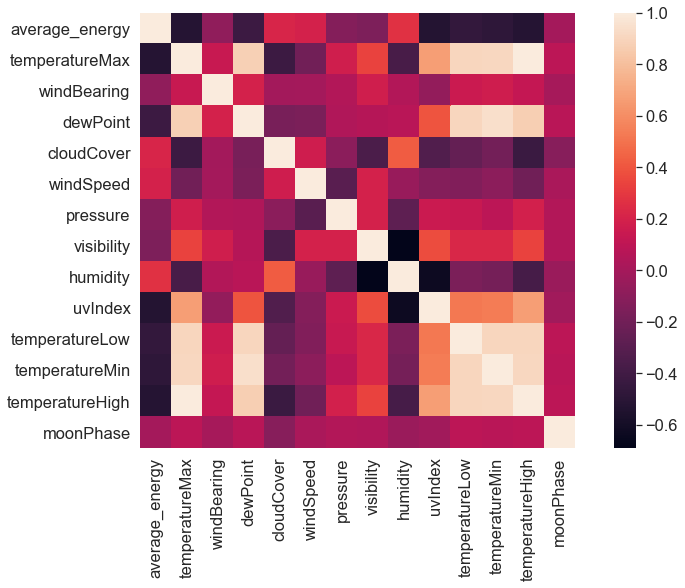

In [37]:
# correlation matrix plot 
Correlation_Matrix = Combined.corr(method = "pearson")
sns.heatmap(Correlation_Matrix, vmax=1, square= True)

In [38]:
Combined.head(5)

,date,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase
0,01/01/2013,13.65,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63
1,01/02/2013,13.80,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68
2,01/03/2013,13.70,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62
3,01/04/2013,13.94,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72
4,01/05/2013,14.44,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75


# Bank Holiday Data

In [39]:
# importing uk_bank_holidays data
Bank_Holiday_Dates = pd.read_csv(r'C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\smart-meters-in-london/uk_bank_holidays.csv')
Bank_Holiday_Dates.head(5)

,Bank holidays,Type
0,26/12/2013,Boxing Day
1,25/12/2013,Christmas Day
2,26/08/2013,Summer bank holiday
3,27/05/2013,Spring bank holiday
4,05/06/2013,Early May bank holiday


In [40]:
Bank_Holiday_Dates.rename(columns = {"Bank holidays" : "date"}, inplace = True)

In [41]:
Combined = Combined.merge(Bank_Holiday_Dates, left_on = 'date',right_on = 'date',how = 'left')

In [42]:
Combined.loc[Combined['Type'].notnull(), 'Type'] = 1
Combined['Type']=Combined['Type'].fillna(0)
Combined.head(5)

,date,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase,Type
0,01/01/2013,13.65,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63,1
1,01/02/2013,13.80,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68,0
2,01/03/2013,13.70,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62,0
3,01/04/2013,13.94,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72,1
4,01/05/2013,14.44,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75,0


In [43]:
Combined.Type.unique()

array([1, 0], dtype=int64)

In [44]:
Combined.rename(columns = {"Type" : "Bank Holiday Indicator"}, inplace = True)

In [45]:
# checking if Bank_Holiday column was added
# in the Bank_Holiday 1 means the day is a bank holiday and 0 means the day is not a bank holiday
# this makes sense as 01/01/2013 is New Year's day and the Bank_Holiday column has a 1
Combined.head(5)

,date,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase,Bank Holiday Indicator
0,01/01/2013,13.65,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63,1
1,01/02/2013,13.80,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68,0
2,01/03/2013,13.70,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62,0
3,01/04/2013,13.94,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72,1
4,01/05/2013,14.44,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75,0


In [46]:
# setting day column to a date
Combined['date'] = Combined['date'].astype('datetime64[D]')

In [47]:
Combined.dtypes

date                      datetime64[ns]
average_energy                   float64
temperatureMax                   float64
windBearing                        int64
dewPoint                         float64
cloudCover                       float64
windSpeed                        float64
pressure                         float64
visibility                       float64
humidity                         float64
uvIndex                          float64
temperatureLow                   float64
temperatureMin                   float64
temperatureHigh                  float64
moonPhase                        float64
Bank Holiday Indicator             int64
dtype: object

In [48]:
# sorting date values
Combined = Combined.sort_values(by = 'date')

In [49]:
# date values back to string
Combined['date'] = Combined['date'].dt.strftime('%d/%m/%Y')

In [50]:
# checking if month and year columns were added
Combined.head(5)

,date,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase,Bank Holiday Indicator
0,01/01/2013,13.65,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63,1
1,02/01/2013,13.80,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68,0
2,03/01/2013,13.70,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62,0
3,04/01/2013,13.94,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72,1
4,05/01/2013,14.44,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75,0


In [51]:
# setting day as an index
Combined.set_index('date', inplace=True)

In [52]:
Combined.rename(columns = {"Type" : "Bank_Holiday_Indicator"}, inplace = True)
Combined.reset_index()

,date,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase,Bank Holiday Indicator
0,01/01/2013,13.65,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63,1
1,02/01/2013,13.80,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68,0
2,03/01/2013,13.70,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62,0
3,04/01/2013,13.94,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72,1
4,05/01/2013,14.44,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2013,14.58,10.99,214,4.83,0.37,7.86,986.81,11.43,0.75,1.0,4.27,7.47,10.41,0.82,0
361,28/12/2013,13.95,7.81,230,1.72,0.11,3.17,997.47,13.45,0.77,1.0,0.72,2.86,7.81,0.85,0
362,29/12/2013,14.16,7.56,230,1.34,0.12,3.07,1014.89,14.08,0.84,1.0,5.23,0.72,7.15,0.89,0
363,30/12/2013,14.11,10.22,201,5.98,0.55,6.58,1010.88,11.35,0.83,0.0,6.40,6.40,10.22,0.93,0


In [53]:
# checking if month and year columns were added
Combined.head(5)

,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase,Bank Holiday Indicator
date,,,,,,,,,,,,,,,
01/01/2013,13.65,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63,1
02/01/2013,13.80,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68,0
03/01/2013,13.70,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62,0
04/01/2013,13.94,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72,1
05/01/2013,14.44,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75,0


# Models

In [54]:
# creating a new dataframe with avg_energy,Cluster and Bank_Holiday for modelling
Data_For_Model = Combined[['average_energy', 'temperatureMax','dewPoint','uvIndex','temperatureLow','temperatureMin','temperatureHigh', 'Bank Holiday Indicator']]

# creating the training and test sets
# 70% training and 30% testing 
Training_Size = int(len(Data_For_Model)*0.8)
Training_Set, Testing_Set = Data_For_Model[0:Training_Size], Data_For_Model[Training_Size:len(Data_For_Model)]

In [55]:
# checking the number of training and test rows
print("Training rows:", len(Training_Set))
print("Test rows:", len(Testing_Set))

Training rows: 292
Test rows: 73


In [56]:
# checking the modelling data frame
# make sure that day,avg_energy,Cluster and Bank_Holiday columns are there
Data_For_Model.head(5)

,average_energy,temperatureMax,dewPoint,uvIndex,temperatureLow,temperatureMin,temperatureHigh,Bank Holiday Indicator
date,,,,,,,,
01/01/2013,13.65,7.49,2.40,1.0,4.42,3.31,5.76,1
02/01/2013,13.80,8.03,3.73,1.0,2.90,4.16,7.33,0
03/01/2013,13.70,6.62,0.98,1.0,2.58,2.58,6.62,0
04/01/2013,13.94,7.71,-4.69,3.0,0.48,0.04,7.71,1
05/01/2013,14.44,16.96,-1.68,5.0,4.48,5.43,16.96,0


In [57]:
# Dickey Fuller's test
DFT = sm.tsa.adfuller(Training_Set.average_energy, autolag='AIC')
pd.Series(DFT[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])

Test Statistic                  -1.709769
p-value                          0.426086
Lags Used                       15.000000
Number of Observations Used    276.000000
dtype: float64

In [58]:
# function for differencing
def difference(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset.iloc[i] - dataset.iloc[i - interval]
        diff.append(value)
    return diff

In [59]:
# Dickey Fuller's test with differencing function added
DFT2  = sm.tsa.adfuller(difference(Training_Set.average_energy,1), autolag='AIC')
pd.Series(DFT2[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])

Test Statistic                  -4.589620
p-value                          0.000135
Lags Used                       14.000000
Number of Observations Used    276.000000
dtype: float64

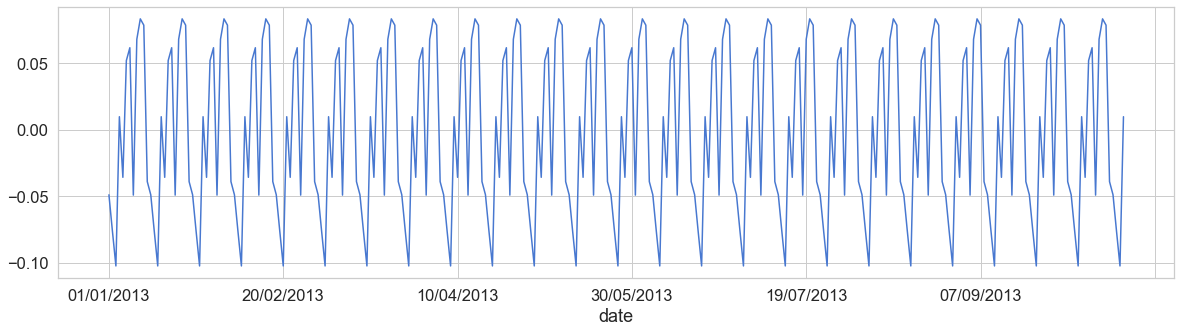

In [60]:
# seasonal decomposition
Seasonal_Decomposition = sm.tsa.seasonal_decompose(Training_Set.average_energy,freq=12)
Seasonal_Decomposition.seasonal.plot(figsize=(20,5))

Text(0.5, 1.0, 'Seasonal Decomposition')

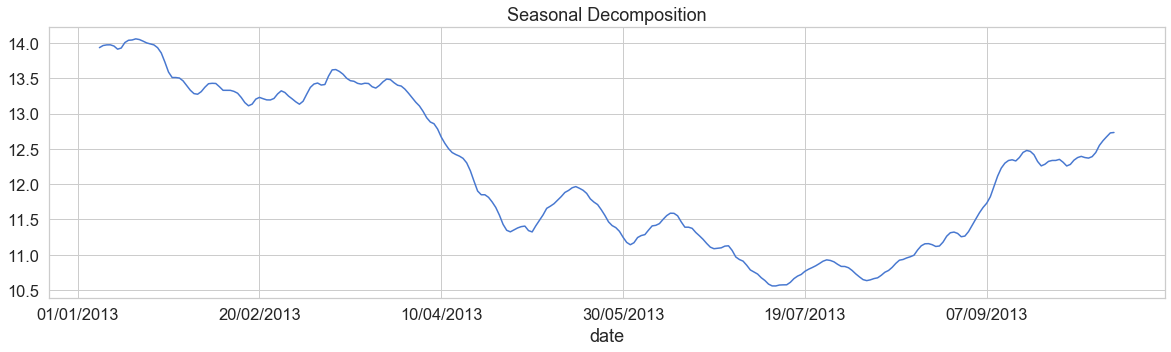

In [61]:
# seasonal decomposition plot
SDP =Seasonal_Decomposition.trend.plot(figsize=(20,5))
SDP.set_title("Seasonal Decomposition")


In [62]:
# Seasonal Arima Model
dependent_variable = Training_Set['average_energy']
predictor_variables = sm.add_constant(Training_Set[['temperatureMax','dewPoint','uvIndex','temperatureLow','temperatureMin','temperatureHigh','Bank Holiday Indicator']])

Model1 = sm.tsa.statespace.SARIMAX(endog=dependent_variable, exog=predictor_variables, order=(7,1,1),seasonal_order=(1,1, 0, 12),trend='c')
Model1_fit = Model1.fit()
Model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                      average_energy   No. Observations:                  292
Model:             SARIMAX(7, 1, 1)x(1, 1, [], 12)   Log Likelihood                -180.297
Date:                             Sun, 28 Jun 2020   AIC                            398.594
Time:                                     19:58:37   BIC                            467.587
Sample:                                          0   HQIC                           426.270
                                             - 292                                         
Covariance Type:                               opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  0.0054      0.021      0.258      0.796      -0.035       0.046
const                    1.95e-08   1.11e-08      1.756      0.079   -2.26e-09    4.13e-08
temperatureMax             0.0617      0.056      1.109      0.268      -0.047       0.171
dewPoint                  -0.0328      0.014     -2.338      0.019      -0.060      -0.005
uvIndex                   -0.0719      0.027     -2.640      0.008      -0.125      -0.019
temperatureLow             0.0056      0.011      0.514      0.607      -0.016       0.027
temperatureMin             0.0097      0.014      0.711      0.477      -0.017       0.037
temperatureHigh           -0.0456      0.055     -0.834      0.404      -0.153       0.062
Bank Holiday Indicator    -0.3228      0.137     -2.355      0.019      -0.591      -0.054
ar.L1                     -0.1064      0.365     -0.291      0.771      -0.822       0.610
ar.L2                     -0.2181      0.159     -1.371      0.170      -0.530       0.094
ar.L3                     -0.1473      0.151     -0.977      0.328      -0.443       0.148
ar.L4                     -0.3187      0.126     -2.532      0.011      -0.565      -0.072
ar.L5                     -0.1658      0.178     -0.930      0.352      -0.515       0.184
ar.L6                      0.0689      0.135      0.512      0.609      -0.195       0.333
ar.L7                      0.1807      0.074      2.431      0.015       0.035       0.326
ma.L1                     -0.3049      0.373     -0.818      0.414      -1.036       0.426
ar.S.L12                  -0.5588      0.061     -9.167      0.000      -0.678      -0.439
sigma2                     0.2098      0.019     11.291      0.000       0.173       0.246
===================================================================================
Ljung-Box (Q):                       98.64   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.00   Prob(JB):                         0.87
Heteroskedasticity (H):               0.64   Skew:                            -0.08
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.43e+18. Standard errors may be unstable.
"""

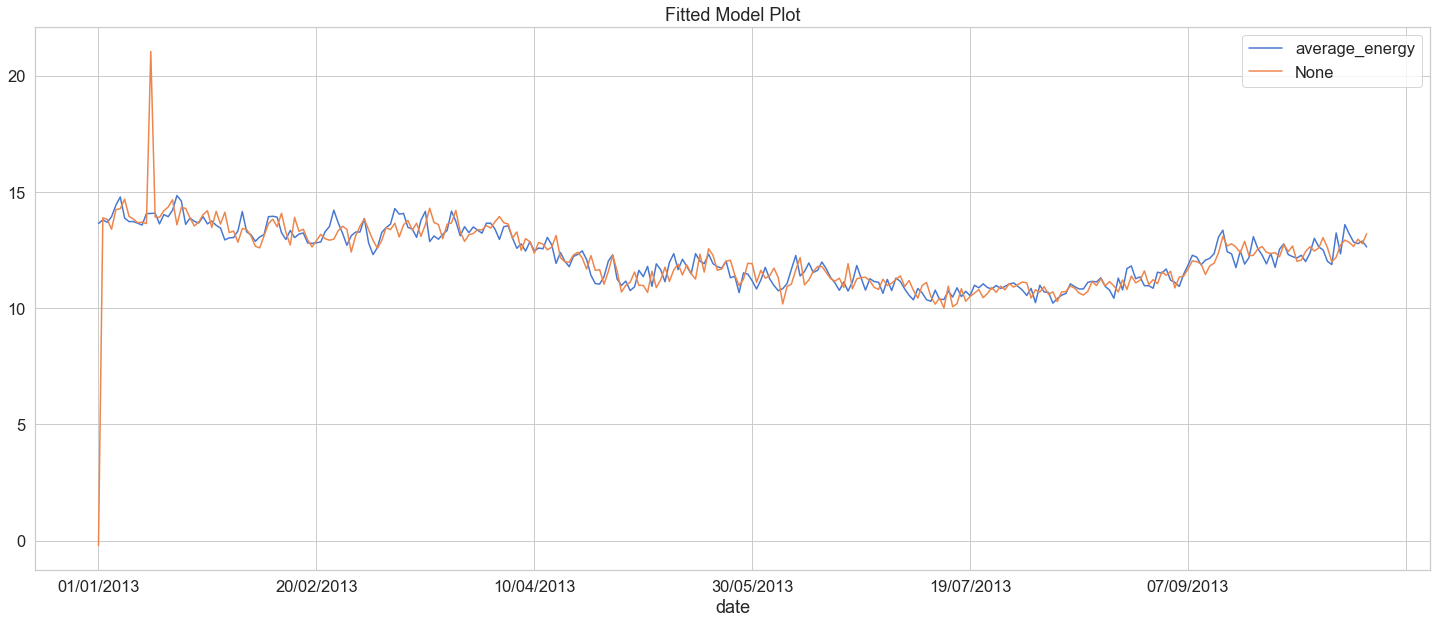

In [63]:
# checking how well the model is fitting 
FMP=Training_Set['average_energy'].plot(figsize=(25,10))
FMP.set_title("Fitted Model Plot")
Model1_fit.fittedvalues.plot()
FMP.legend()
plt.show()

In [64]:
# predicting using test set
# creating Predicted_Energy column that shows the predicted energy for each day
Prediction = Model1_fit.predict(start = len(Training_Set),end = len(Training_Set)+len(Testing_Set)-1,exog = sm.add_constant(Testing_Set[['temperatureMax','dewPoint','uvIndex','temperatureLow','temperatureMin','temperatureHigh', 'Bank Holiday Indicator']]))
Testing_Set['Predicted_Energy'] = Prediction.values
Testing_Set['residual'] = Testing_Set.average_energy - Testing_Set.Predicted_Energy
Testing_Set.head(5)

,average_energy,temperatureMax,dewPoint,uvIndex,temperatureLow,temperatureMin,temperatureHigh,Bank Holiday Indicator,Predicted_Energy,residual
date,,,,,,,,,,
19/10/2013,12.80,17.04,12.21,1.0,12.16,12.16,17.04,0,12.706261,0.093739
20/10/2013,13.30,17.53,13.38,1.0,16.32,13.26,17.53,0,13.287293,0.012707
21/10/2013,12.70,18.03,14.21,1.0,13.79,13.79,18.03,0,12.522920,0.177080
22/10/2013,12.26,16.53,10.86,1.0,6.83,9.99,16.53,0,12.693823,-0.433823
23/10/2013,12.42,16.91,9.37,1.0,13.14,6.83,16.91,0,13.295487,-0.875487


In [65]:
MAPE = np.mean(np.abs((Testing_Set['average_energy'] - Testing_Set['Predicted_Energy']) / Testing_Set['average_energy'])) * 100
print("Mean Absolute Percentage Error (MAPE):", round(MAPE,2))
MAE = Testing_Set['residual'].sum()/len(Testing_Set)
print("Mean Absolute Error (MAE):", round(MAE,2))
RMSE=rmse(Testing_Set['average_energy'], Testing_Set['Predicted_Energy'])
print('RMSE:',round(RMSE,2))

Mean Absolute Percentage Error (MAPE): 3.34
Mean Absolute Error (MAE): -0.1
RMSE: 0.57


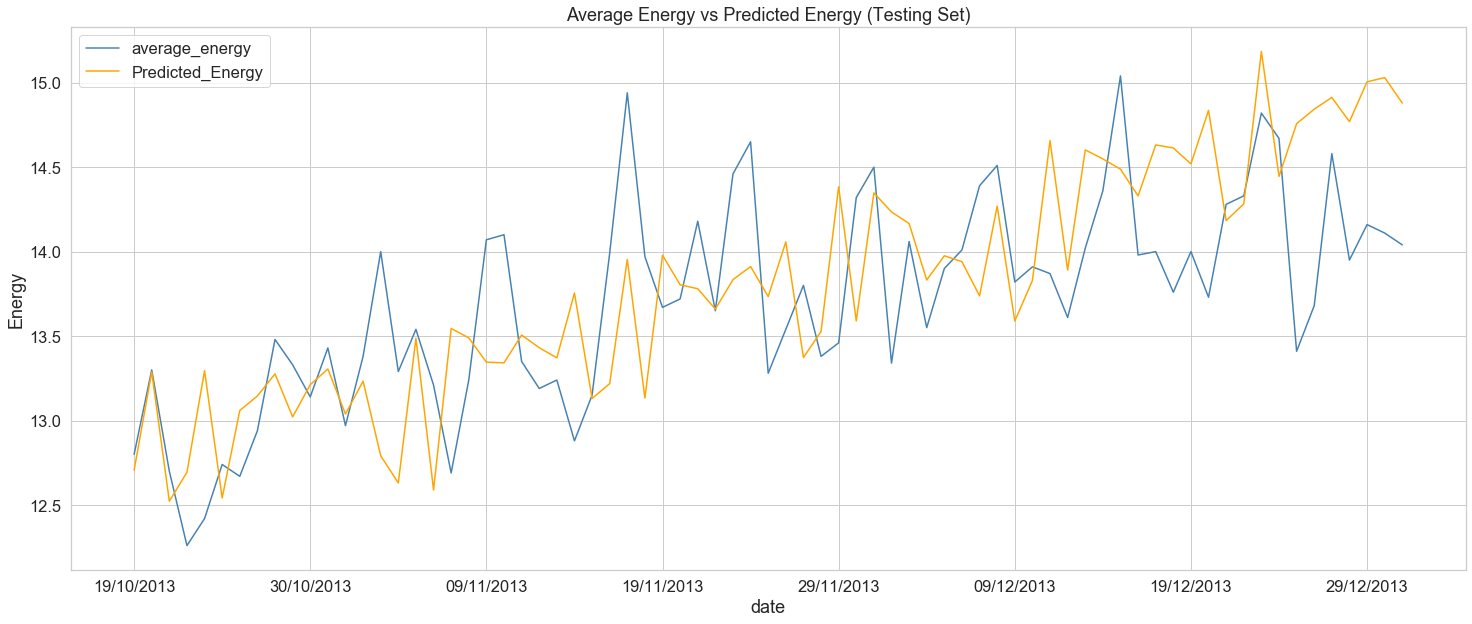

In [66]:
# plotting average energy and predicted energy from testing set
TSP = Testing_Set['average_energy'].plot(figsize=(25,10),color = 'steelblue')
TSP.set_title("Average Energy vs Predicted Energy (Testing Set)")
Testing_Set['Predicted_Energy'].plot(color = "orange")
TSP.set_ylabel("Energy")
TSP.legend()
plt.show()

Text(0.5, 1.0, 'Residual Plot')

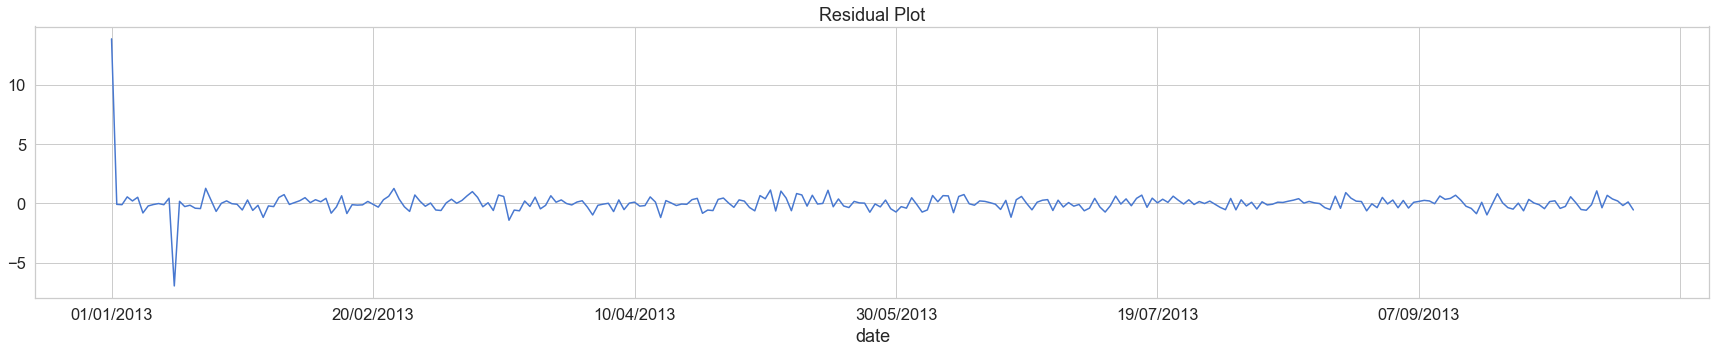

In [67]:
# model residual plot
M1R = Model1_fit.resid.plot(figsize= (30,5))
M1R.set_title("Residual Plot")